In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

IMPORT OF THE RAW DATA

In [3]:
df = pd.read_excel (r'Data.xlsx')
df = pd.DataFrame(df)
depth= df.shape[0]
width= df.shape[1]

DELETE PROTEINS WITH UNRELIABLE FEATURES

In [4]:
#Delete proteins with peptides number=1
pep_list=list(df['Peptides number'])

for j in range(0, depth):
    if pep_list[j]<2:
        df.drop(index=[j], axis=1, inplace=True)
df = df.reset_index(drop=True)
depth=df.shape[0]
width=df.shape[1]

#Delete proteins with razor+peptides number <=2
razor_list=list(df['Razor+UnPepNum'])

for j in range(0, depth):
    if razor_list[j]<=2:
        df.drop(index=[j], axis=1, inplace=True)
df = df.reset_index(drop=True)

In [5]:
df

,Proteins,SAM-NF,POLY-NF,SAM-BSA,POLY-BSA,SAM-UEA,POLY-UEA,Peptides number,Razor+UnPepNum
0,Alpha-2-macroglobulin-like protein 1 OS,20.5173,21.8569,21.9008,21.9543,21.7097,21.5706,12,12
1,Immunoglobulin lambda-1 light chain OS,22.8842,22.6262,23.4350,23.3458,23.0369,23.0921,2,5
2,Tripeptidyl-peptidase 1 OS,18.7143,16.5568,17.6698,19.3970,17.5424,19.1747,4,4
3,Proteasome subunit alpha type-7 OS,19.5581,20.1610,19.7335,20.0331,18.3899,20.2649,4,4
4,CD5 antigen-like OS,22.9110,20.8758,22.9463,22.2077,22.5743,19.6007,8,8
...,...,...,...,...,...,...,...,...,...
178,Deleted in malig0t brain tumors 1 protein OS,19.0742,20.0193,18.0224,23.2355,20.6227,19.5053,5,5
179,Carboxypeptidase A4 OS,19.9649,20.0307,21.6153,21.5551,21.7695,21.2664,7,7
180,Serpin B13 OS,19.2551,20.2293,18.0445,19.9880,19.4387,21.0020,5,5
181,Kallikrein-5 OS,19.1032,18.9195,19.8059,18.9961,18.2940,19.2870,3,3


CREATE A HEATMAP

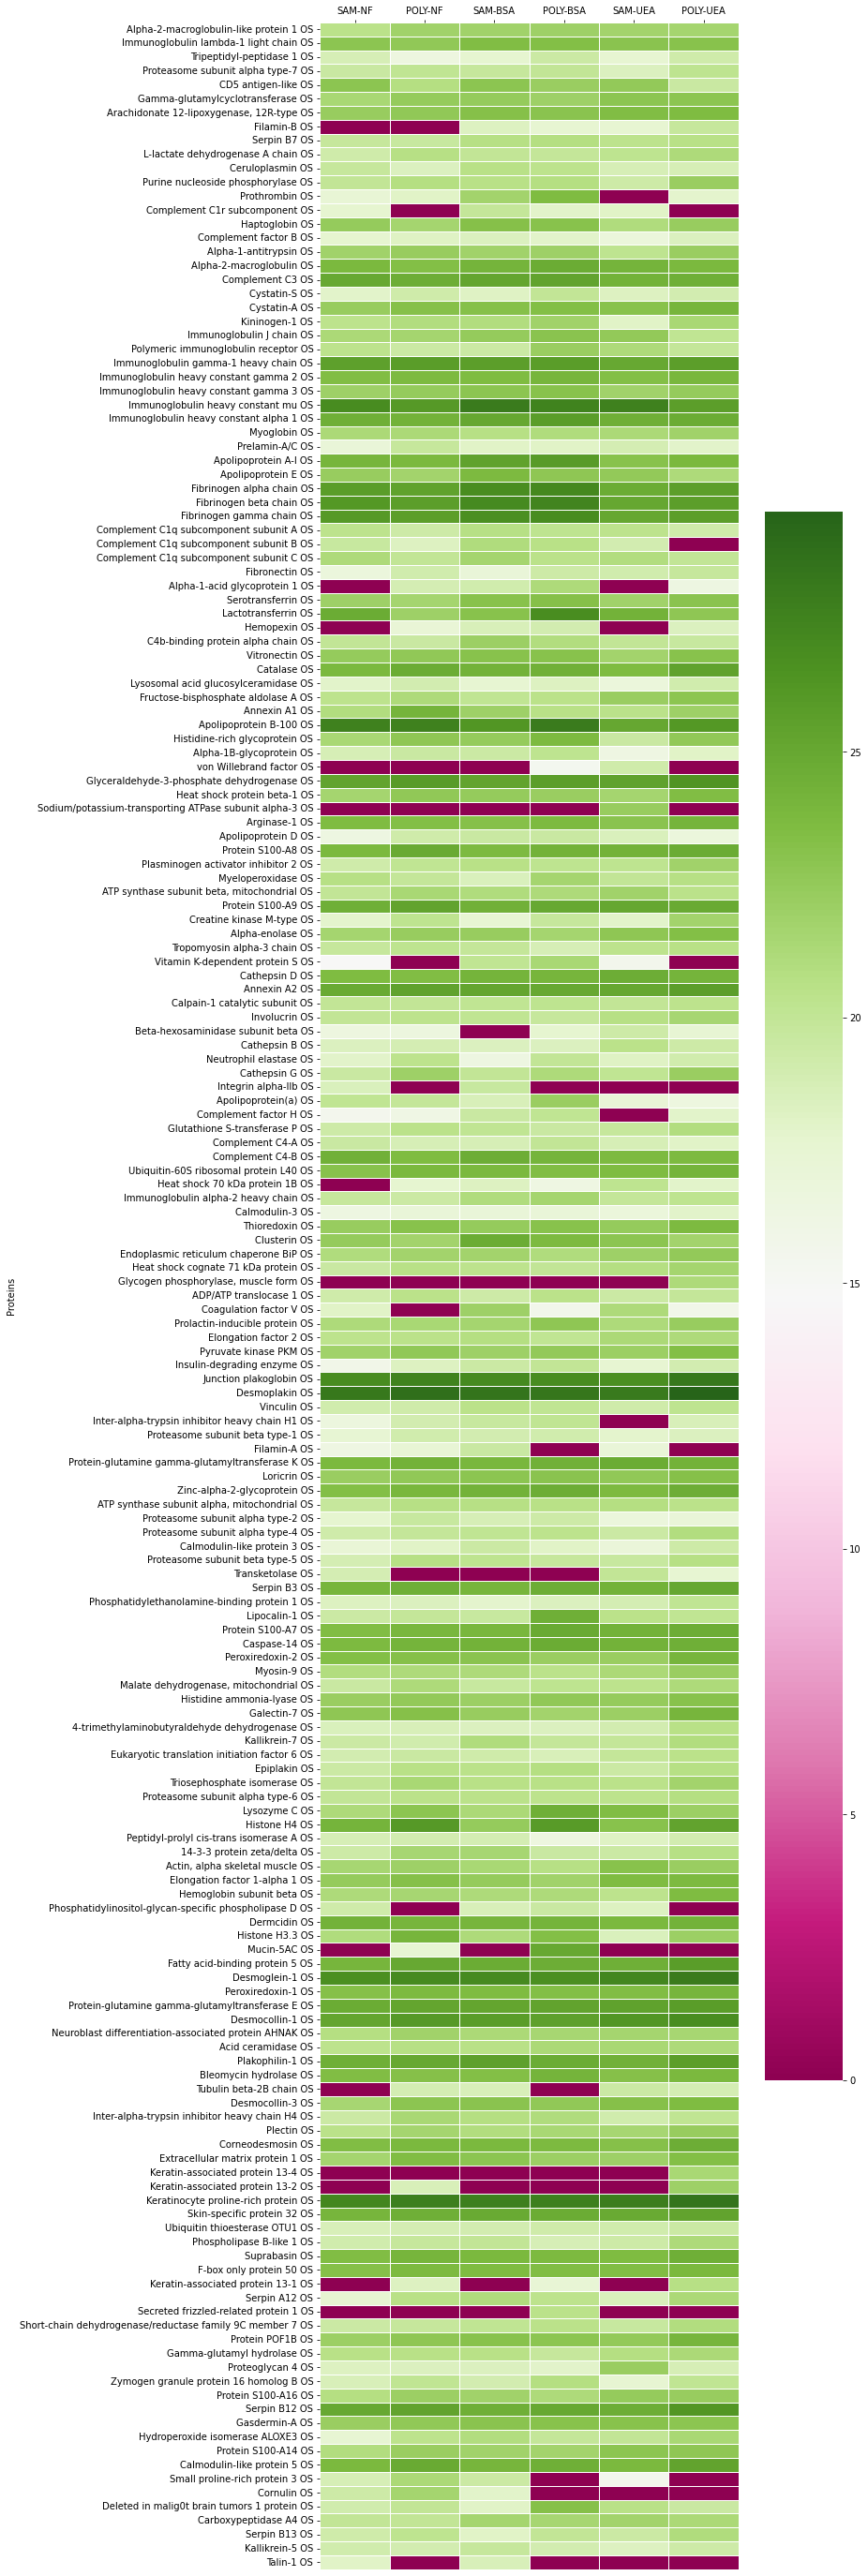

In [6]:
cleaned_df=df.iloc[:, 0:7]
plt.subplots(figsize=(10,50))
cleaned_df.index=cleaned_df['Proteins']
cleaned_df.drop('Proteins', inplace=True, axis=1)
g=sns.heatmap(cleaned_df, linewidths=.5, cmap="PiYG")
g.xaxis.set_ticks_position("top")

SORTING BY SUM OF INTENSITIES

In [7]:
# Create column with a sum
sum_df=df.iloc[:,0:7]
raw_sum=sum_df.iloc[:,1:7].sum(axis='columns')
sum_df=sum_df.assign(Sum=raw_sum)


# Provide sorting
sum_df_sorted = sum_df.sort_values(by=["Sum"],ascending=False)
sum_df_sorted.index=sum_df['Proteins']
sum_df_sorted.drop('Proteins', inplace=True, axis=1)


In [8]:
sum_df_sorted

,SAM-NF,POLY-NF,SAM-BSA,POLY-BSA,SAM-UEA,POLY-UEA,Sum
Proteins,,,,,,,
Alpha-2-macroglobulin-like protein 1 OS,28.2008,28.8267,28.4389,28.3601,28.0779,29.5264,171.4308
Immunoglobulin lambda-1 light chain OS,27.2761,27.7566,27.7645,27.7556,27.8247,28.4667,166.8442
Tripeptidyl-peptidase 1 OS,26.9184,27.5313,27.0846,26.9488,26.7052,28.2300,163.4183
Proteasome subunit alpha type-7 OS,26.6959,27.1028,27.0797,26.7089,27.3020,27.9233,162.8126
CD5 antigen-like OS,26.9887,25.9889,28.0075,27.4972,27.6769,25.6699,161.8291
...,...,...,...,...,...,...,...
Deleted in malig0t brain tumors 1 protein OS,0.0000,0.0000,0.0000,15.4208,19.2228,0.0000,34.6436
Carboxypeptidase A4 OS,0.0000,0.0000,0.0000,0.0000,22.3732,0.0000,22.3732
Serpin B13 OS,0.0000,0.0000,0.0000,0.0000,0.0000,21.3441,21.3441


CREATE A HEATMAP

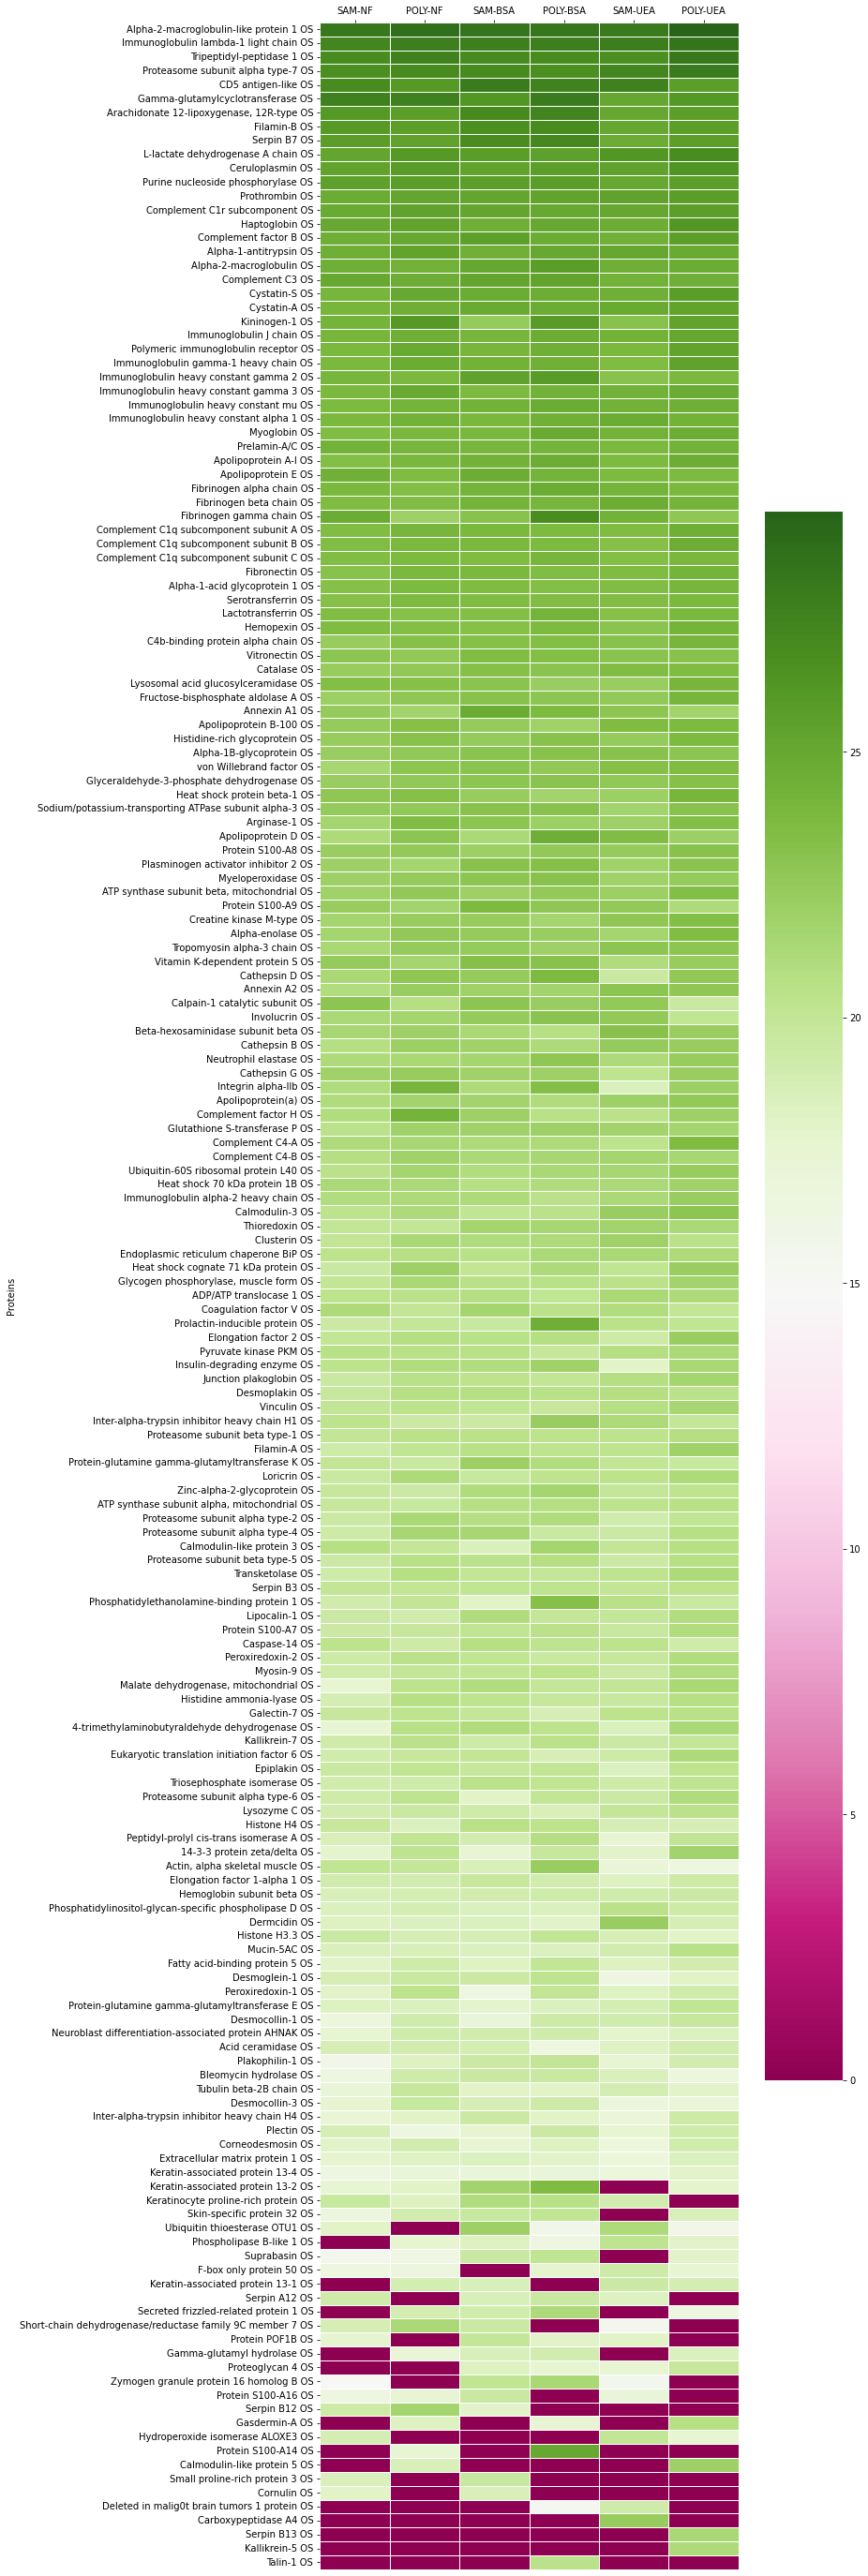

In [9]:
plt.subplots(figsize=(10,50))
g=sns.heatmap(sum_df_sorted.iloc[:,:-1], linewidths=.5, cmap="PiYG")
g.xaxis.set_ticks_position("top")

CLUSTERIZATION

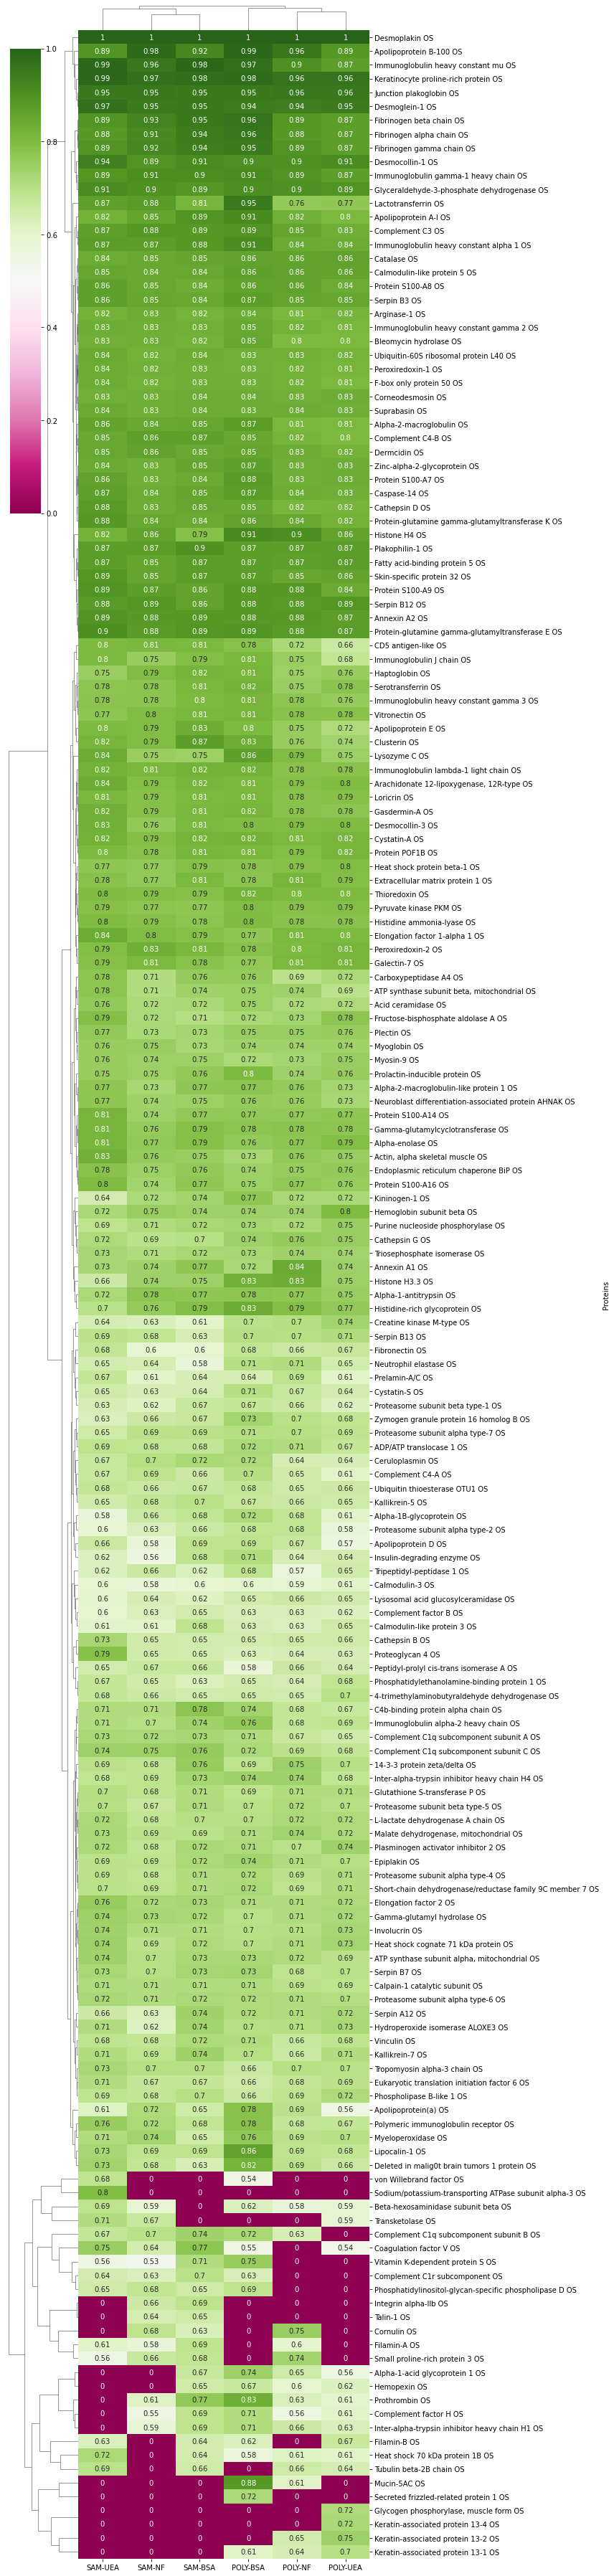

In [10]:
df.index=df['Proteins']
g=sns.clustermap(df.iloc[:, 1:7], figsize=(12,50), cmap="PiYG",annot=True, row_cluster=True, col_cluster=True, dendrogram_ratio=(0.2, .01),
                method="complete", metric='euclidean', standard_scale=1)

COMPARISON OF PRETEINS INTENSITIES ON TWO SURFACES

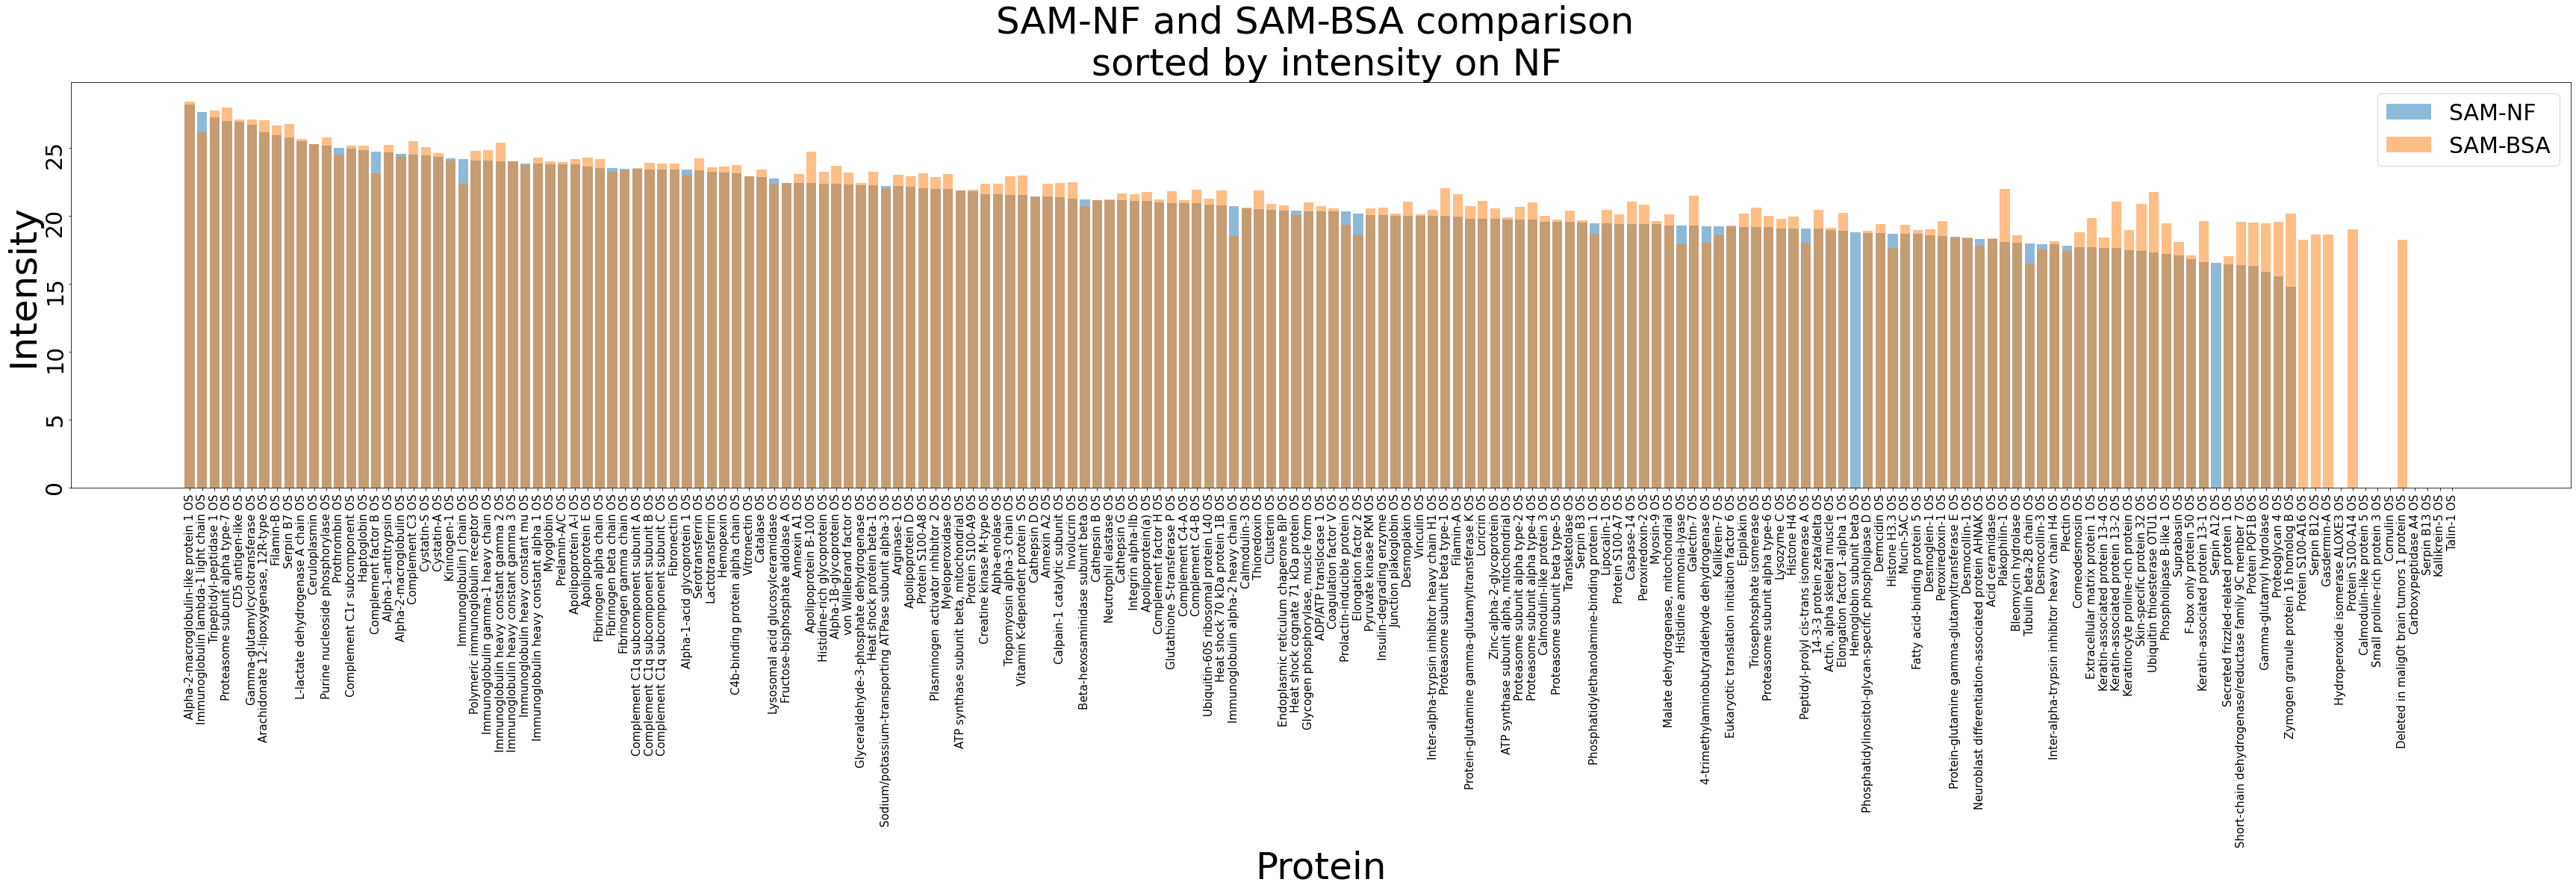

In [11]:
plt.figure(figsize=(60,10))
plt.bar(df['Proteins'], df.sort_values(by=["SAM-NF"],ascending=False)["SAM-NF"],alpha=0.5, label='SAM-NF')
plt.bar(df['Proteins'], df.sort_values(by=["SAM-NF"],ascending=False)["SAM-BSA"],alpha=0.5,label='SAM-BSA')
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(rotation = 90, fontsize=30)
plt.title("SAM-NF and SAM-BSA comparison \n sorted by intensity on NF",fontsize=50 )
plt.xlabel("Protein",fontsize=50)
plt.ylabel('Intensity',fontsize=50)
plt.legend(loc='best', fontsize=30)
plt.show()

VISUALIZATION OF DIFFERENCE BETWEEN TWO CONDITIONS

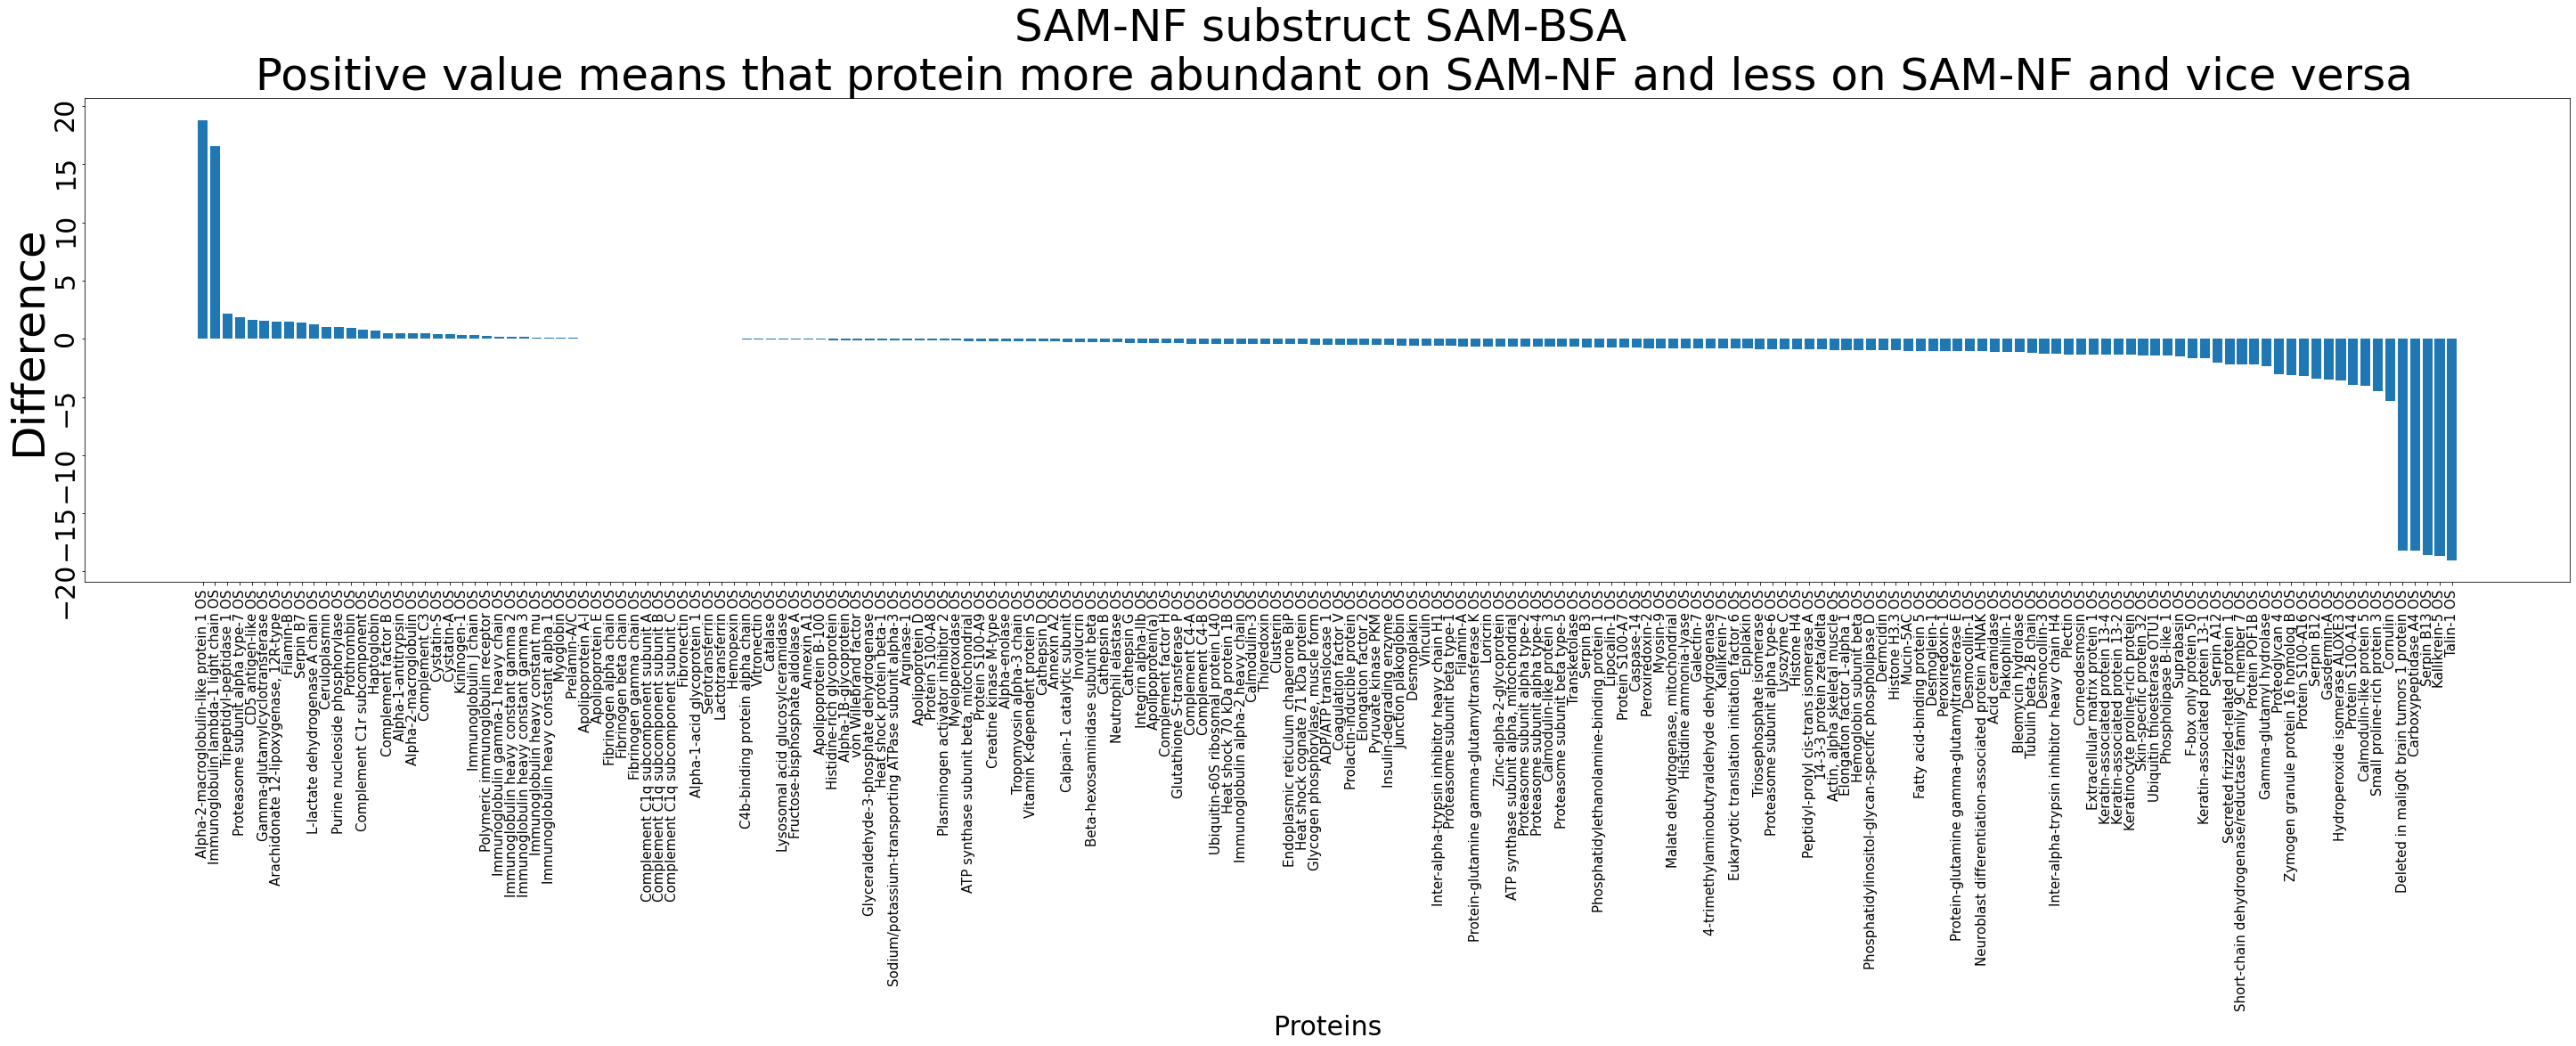

In [13]:
diff = df['SAM-NF']-df['SAM-BSA']
df_diff = df.assign(diff=diff)

plt.figure(figsize=(50,10))
plt.bar(df_diff['Proteins'], df_diff.sort_values(by=["diff"],ascending=False)["diff"], orientation=u'vertical')
plt.xticks(rotation = 90, fontsize=15)
plt.yticks(rotation = 90, fontsize=30)
plt.title("SAM-NF substruct SAM-BSA \n Positive value means that protein more abundant on SAM-NF and less on SAM-NF and vice versa",fontsize=50 )
plt.xlabel("Proteins",fontsize=30)
plt.ylabel('Difference',fontsize=50)
plt.show()